# ***Introduction to Radar Using Python and MATLAB***
## Andy Harrison - Copyright (C) 2019 Artech House
<br/>

# Stratified Sphere Radar Cross Section
***

Referring to Section 7.4.1.5, Mie gives the exact solution for scattering from a sphere.  The solution is composed of vector wave functions defined in a spherical coordinate system.  The terms of the Mie series are obtained from boundary value techniques.  Therefore, the Mie formulation may be employed regardless of the composition of the sphere.  To calculate the radar cross section of a sphere, use the Mie formulation along with far field approximations to give (Equations 7.42 and 7.43)

\begin{align}
    S_1(\theta_o) &= \sum\limits_{n=1}^\infty(j)^{n+1}\Big[A_n\frac{P_n^1(\cos\theta_o)}{\sin\theta_o} - jB_n\frac{d}{d\theta_o}P_n^1(\cos\theta_o)\Big], \\ \nonumber \\
    S_2(\theta_o) &= \sum\limits_{n=1}^\infty(j)^{n+1}\Big[A_n\frac{d}{d\theta_o}\frac{P_n^1(\cos\theta_o)}{\sin\theta_o} - jB_nP_n^1(\cos\theta_o)\Big],
\end{align}

where $P_n^1$ is the associated Legendre polynomial and may be calculated using the SciPy implementation ***scipy.special.lpmn(m, n, z)***.  $S_1(\theta_o)$ and $S_2(\theta_o)$ are the complex far-field scattered radiation values for the $\hat{\theta}$ and $\hat{\phi}$ directions.  The radar cross section for the $\hat{\theta}$ and $\hat{\phi}$ polarization states is then found to be (Equations 7.44 and 7.45)

\begin{align}\label{eq:rcs_mie}
    \sigma_\theta &= \frac{4\pi}{k_0^2}S_1(\theta_o)\cos^2(\phi_0) \hspace{0.5in} \text{(m^2)}, \\ \nonumber \\
    \sigma_\phi &= \frac{4\pi}{k_0^2}S_2(\theta_o)\sin^2(\phi_0) \hspace{0.5in} \text{(m}^2\text{)}.
\end{align}

For the $N$-layer concentric sphere, use the Mie coefficients of the following form (Equations 7.46 and 7.47)

\begin{align}\label{eq:mie_coefficients_layered}
    A_n = -(j)^n &\frac{2n+1}{n(n+1)}\frac{k_0a_0J_n(k_0a_0) + jZ_n(k_0a_0)(k_0a_0J_n^\prime(k_0a_0)}{k_0a_0H_n(k_0a_0) + jZ_n(k_0a_0)(k_0a_0H_n^\prime(k_0a_0)},  \\ \nonumber \\
    B_n = (j)^n &\frac{2n+1}{n(n+1)}\frac{k_0a_0J_n(k_0a_0) + jY_n(k_0a_0)(k_0a_0J_n^\prime(k_0a_0)}{k_0a_0H_n(k_0a_0) + jY_n(k_0a_0)(k_0a_0H_n^\prime(k_0a_0)}.
\end{align}

Ruck et al. showed that the modal surface impedance and admittance can be derived using an iterative technique similar to the method used for transmission lines.  To begin, the impedance at the interface between the core and the first layer, $Z_n^N$, is determined independently.  Then, the impedance at the second interface, $Z_n^{N-1}$, is determined from $Z_n^N$.  This process continues until the impedance at the outermost surface, $Z_n^0$, is found.  Then $Z_n(k_0a_0) = j(Z_n^0/\eta)$.  Following the same process for the admittance, $Y_n(k_0a_0)$ may also be calculated. 
The impedance and admittance are used in the Mie coefficients of (7.46) for the scattering radiation calculation in (7.42).  Finally, the radar cross section is obtained from (7.44). 

***

Begin by getting the library path

In [1]:
import lib_path

Set the operating frequency (Hz), the radii (m), the relative permeabilities, the relative permittivities, the number of modes and the flag for perfectly conducting core

In [2]:
frequency = 1e9

radius = [1.0, 1.25]

mu_r = [1.0, 1.0]

eps_r = [1.0, 4.0]

number_of_modes = 60

pec = True

Size the ordered arrays

In [3]:
from numpy import ones

nr = len(radius)


mu = ones(nr + 1)

eps = ones(nr + 1)

ra = ones(nr)

Set up the parameters in the correct order

In [4]:
i = 0

for r in radius:

    ra[nr - 1 - i] = float(r)

    i += 1



i = 0

for m, e in zip(mu_r, eps_r):

    mu[nr - i] = float(m)

    eps[nr - i] = float(e)

    i += 1

Set the observation angles (radians) using the `linspace` routine from `scipy`

In [5]:
from numpy import linspace

from scipy.constants import pi


observation_angle = linspace(0, pi, 721)

Calculate the coefficients for the sphere

In [6]:
from Libs.rcs.stratified_sphere import coefficients

An, Bn = coefficients(frequency, eps, mu, ra, number_of_modes, pec)

Calculate the radar cross section (m^2) for the stratified sphere

In [7]:
from Libs.rcs.stratified_sphere import radar_cross_section

from scipy import array

et = array([radar_cross_section(frequency, oa, 0, An, Bn) for oa in observation_angle])

ep = array([radar_cross_section(frequency, oa, 90, An, Bn) for oa in observation_angle])

Display the radar cross section (dBsm) for the stratified sphere using the `matplotlib` routines

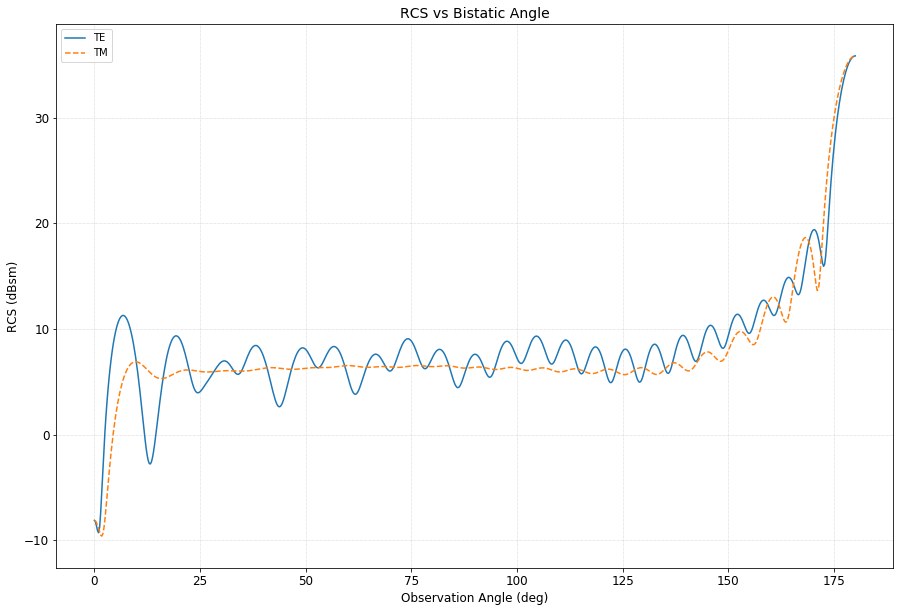

In [9]:
from matplotlib import pyplot as plt

from numpy import log10, degrees


# Set the figure size

plt.rcParams["figure.figsize"] = (15, 10)



# Display the results

plt.plot(degrees(observation_angle), 20.0 * log10(abs(ep[:, 1])), '', label='TE')

plt.plot(degrees(observation_angle), 20.0 * log10(abs(et[:, 0])), '--', label='TM')



# Set the plot title and labels

plt.title('RCS vs Bistatic Angle', size=14)

plt.ylabel('RCS (dBsm)', size=12)

plt.xlabel('Observation Angle (deg)', size=12)

plt.ylim(min(20.0 * log10(abs(et[:,0]))) - 3, max(20.0 * log10(abs(et[:,0]))) + 3)



# Set the tick label size

plt.tick_params(labelsize=12)



# Turn on the grid

plt.grid(linestyle=':', linewidth=0.5)


# Set the legend

plt.legend(loc='upper left', prop={'size': 10})